# hitters data set homework

In [75]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [4]:
hitters = pd.read_csv('Hitters.csv')

In [5]:
df = hitters.copy()

In [6]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [8]:
df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1


In [9]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771,-0.101663,-0.045441,-0.057655
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675,-0.101038,-0.071143,-0.060608
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028,-0.177258,-0.017206,-0.166044
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859,-0.150392,-0.076311,-0.115446
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457,-0.145597,-0.075531,-0.120124
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867,-0.045337,-0.059086,-0.020029
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657,-0.047261,0.021126,-0.042919
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135,-0.028738,0.022965,-0.016502
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910,-0.025790,0.013584,-0.010047
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931,-0.098383,0.006783,-0.097461


In [11]:
df1 = df.drop(['Errors','Assists','League_N','NewLeague_N'], axis = 1)

In [12]:
df1

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Salary,Division_W
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,NaN,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,91.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,700.0,0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,875.0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,385.0,1
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,960.0,0


In [13]:
df1.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Salary,Division_W
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.394771,-0.045441
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.438675,-0.071143
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,0.343028,-0.017206
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.419859,-0.076311
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.449457,-0.075531
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.443867,-0.059086
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,0.400657,0.021126
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.526135,0.022965
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,0.548910,0.013584
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,0.524931,0.006783


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    int64  
 1   Hits         322 non-null    int64  
 2   HmRun        322 non-null    int64  
 3   Runs         322 non-null    int64  
 4   RBI          322 non-null    int64  
 5   Walks        322 non-null    int64  
 6   Years        322 non-null    int64  
 7   CAtBat       322 non-null    int64  
 8   CHits        322 non-null    int64  
 9   CHmRun       322 non-null    int64  
 10  CRuns        322 non-null    int64  
 11  CRBI         322 non-null    int64  
 12  CWalks       322 non-null    int64  
 13  PutOuts      322 non-null    int64  
 14  Assists      322 non-null    int64  
 15  Errors       322 non-null    int64  
 16  Salary       263 non-null    float64
 17  League_N     322 non-null    uint8  
 18  Division_W   322 non-null    uint8  
 19  NewLeagu

### Outlier Analysis (Just look)

In [15]:
df1 = df1.select_dtypes(include = ['float64', 'int64']) 
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,91.5


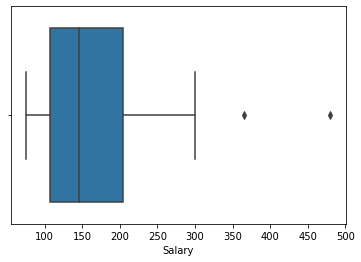

In [46]:
#df1_salary = df1[df1['Years']==3]['Salary']
#sns.boxplot(x = df1_salary);

In [55]:
# Aykiri Gozlem Yapmaya Ihtiyac Yoktur
#for feature in [df1_salary]:

    Q1 = df1_salary[feature].quantile(0.25)
    Q3 = df1_salary[feature].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df1_salary[(df1_salary[feature] > upper) | (df1_salary[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df1_salary[(df1_salary[feature] > upper) | (df1_salary[feature] < lower)].shape[0])
    else:
        print(feature, "no")

ValueError: cannot reindex from a duplicate axis

In [40]:
# Aykiri Gozlem Yapmaya Ihtiyac Yoktur
#for feature in ["Salary"]:

    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df1[(df1[feature] > upper) | (df1[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df1[(df1[feature] > upper) | (df1[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Salary yes
11


In [22]:
df1.groupby('Years').Salary.max()

Years
1      920.000
2     2127.333
3      480.000
4     1220.000
5     1975.000
6     1350.000
7     1183.333
8     1670.000
9     1940.000
10    2460.000
11    1900.000
12    1300.000
13    2412.500
14    1861.460
15     933.333
16    1050.000
17     950.000
18    1450.000
19     500.000
20     487.500
23         NaN
24     750.000
Name: Salary, dtype: float64

In [47]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1.groupby(['Years']).Salary.describe().T.describe([0.01,.05,.75,.90,.95,.99])

Years,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,23,24
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,1.0,7.00000
mean,206.039331,404.082468,162.914905,335.916825,559.885735,524.755366,567.715565,600.041808,721.008265,708.129992,724.489063,512.862951,955.293317,722.553985,479.872771,476.284774,514.850896,580.434500,428.714286,283.474150,0.0,643.00000
std,293.766001,708.174665,140.035071,373.567746,611.952264,430.754287,373.602121,522.941972,600.640653,759.685440,550.932019,387.930549,772.840480,568.853944,294.581287,328.748070,340.117786,423.450942,188.604272,150.767516,NaN,283.09539
min,17.000000,21.000000,24.000000,28.000000,26.000000,28.000000,19.000000,11.000000,12.000000,12.000000,8.000000,10.000000,10.000000,12.000000,7.000000,4.000000,5.000000,5.000000,1.000000,2.000000,0.0,1.00000
1%,20.570000,24.255000,27.570000,32.165000,29.780000,32.340000,36.131332,19.680000,23.410000,18.160000,38.940000,25.050000,26.100000,28.660000,21.407126,21.920000,21.100000,27.400000,30.940000,15.860000,0.0,45.94000
5%,34.850000,37.275000,41.850000,48.825000,44.900000,49.700000,104.656658,54.400000,69.050000,42.800000,162.700000,85.250000,90.500000,95.300000,79.035632,93.600000,85.500000,117.000000,150.700000,71.300000,0.0,225.70000
50%,108.750000,135.000000,126.250000,244.399443,430.865057,483.078016,600.745605,502.792120,626.875000,611.777843,621.875000,463.333375,805.394719,663.772274,482.500000,433.139095,480.237084,494.737799,500.000000,307.812500,0.0,750.00000
75%,162.527191,272.750328,180.375000,330.714286,590.704327,676.977670,771.875000,748.750045,900.364500,720.550625,848.828125,625.437525,1245.542825,890.299625,639.791554,625.312500,798.749750,717.166800,500.000000,361.718750,0.0,750.00000
90%,416.817312,946.017518,286.625000,611.000000,1050.562500,990.375000,941.249900,1160.750000,1339.749825,1271.750000,1191.250000,896.625000,1861.250000,1265.729725,807.916450,866.250000,897.500000,978.666900,500.000000,437.187500,0.0,750.00000
95%,668.408656,1536.675259,383.312500,915.500000,1512.781250,1170.187500,1062.291450,1415.375000,1639.874912,1865.875000,1545.625000,1098.312500,2136.875000,1563.594862,870.624725,958.125000,923.750000,1214.333450,500.000000,462.343750,0.0,750.00000


# Linear Regression

In [58]:
from sklearn.model_selection import train_test_split

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AtBat    322 non-null    int64  
 1   Hits     322 non-null    int64  
 2   HmRun    322 non-null    int64  
 3   Runs     322 non-null    int64  
 4   RBI      322 non-null    int64  
 5   Walks    322 non-null    int64  
 6   Years    322 non-null    int64  
 7   CAtBat   322 non-null    int64  
 8   CHits    322 non-null    int64  
 9   CHmRun   322 non-null    int64  
 10  CRuns    322 non-null    int64  
 11  CRBI     322 non-null    int64  
 12  CWalks   322 non-null    int64  
 13  PutOuts  322 non-null    int64  
 14  Salary   263 non-null    float64
dtypes: float64(1), int64(14)
memory usage: 37.9 KB


In [69]:
df1 = df1.dropna()

In [70]:
y = df1["Salary"]
X = df1.drop('Salary', axis=1)

In [241]:
# X dataframe'inde Standardizasyon yapilmasi istenirse buraya eklenmeli
# cols = X.columns
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state = 46)

In [72]:
X_train.shape

(210, 14)

In [73]:
X_test.shape

(53, 14)

### Build Model

In [76]:
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
reg_model.intercept_

21.197421475217425

In [78]:
reg_model.coef_

array([-1.29622885,  5.47186031,  4.11896662,  0.76439379, -0.67855726,
        2.1000431 , -1.00182854, -0.38886748,  1.66850846,  2.40724389,
        0.39230642, -0.78376604, -0.02698124,  0.33231432])

### Guess

In [79]:
y_pred = reg_model.predict(X_train)

### RMSE

In [81]:
#egitim hatasi
np.sqrt(mean_squared_error(y_train, y_pred))

263.86419269989364

In [85]:
y_test_pred = reg_model.predict(X_test)

In [86]:
#test hatasi
np.sqrt(mean_squared_error(y_test, y_test_pred))

494.5781861033382

# Ridge Regression

In [88]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

### Build Model

In [89]:
ridge_model = Ridge().fit(X_train,y_train)

In [90]:
ridge_model.intercept_

21.18876221347091

In [91]:
ridge_model.coef_

array([-1.29613011,  5.47121111,  4.11693911,  0.76497996, -0.67783798,
        2.09975591, -0.99984126, -0.38888836,  1.66860875,  2.40745455,
        0.39224321, -0.78384852, -0.02694852,  0.33231589])

### RMSE

In [92]:
#egitim seti basarisi

In [93]:
y_pred = ridge_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

263.86419282562605

In [94]:
# test seti basarisi

In [95]:
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

494.57852614283036

### Model Tuning - Alpha1

In [114]:
alphas1 = np.random.randint(0,1100,1)

In [115]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = alphas1, 
                   cv=10,
                   normalize = True)

In [116]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([1007]), cv=10, fit_intercept=True, gcv_mode=None,
        normalize=True, scoring=None, store_cv_values=False)

In [117]:
ridge_cv.alpha_

1007

In [120]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

### Tuned Model RMSE

In [121]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

508.57321883609796

### Model Tuning - Alpha2

In [123]:
alphas2 = 10**np.linspace(10,-2,100)*0.5

In [124]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = alphas2, 
                   cv=10,
                   normalize = True)

In [125]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [126]:
ridge_cv.alpha_

0.7599555414764666

In [127]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

### Tuned Model RMSE - Alpha2

In [128]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

471.73625496272984

### Model Tuning - Alpha3

In [130]:
alphas3 = np.linspace(0,1,1000)

In [143]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = alphas3, 
                   cv=10,
                   normalize = True)

In [144]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.0...
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [145]:
ridge_cv.alpha_

0.7627627627627628

In [146]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

### Tuned Model RMSE - Alpha3

In [147]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

471.71950807754035

### Model Tuning - AlphaDefault

In [138]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV( 
                   cv=10,
                   normalize = True)

In [139]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=True,
        gcv_mode=None, normalize=True, scoring=None, store_cv_values=False)

In [140]:
ridge_cv.alpha_

1.0

In [141]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

### Tuned Model RMSE - AlphaDefault

In [142]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

470.4092515467964

# Lasso Regression

In [148]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [149]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1


### Build Model

In [153]:
y = df1["Salary"]
X = df1.drop('Salary', axis=1)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [155]:
lasso_model = Lasso().fit(X_train, y_train)

C:\Users\ts-omer.ari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7225357.87715617, tolerance: 3956.6756074595623
  positive)


In [156]:
lasso_model.intercept_

19.920879494234896

In [157]:
lasso_model.coef_

array([-1.31749777,  5.57823278,  4.1259529 ,  0.6869569 , -0.67490008,
        2.14209473, -0.99924504, -0.37677018,  1.60363828,  2.32088645,
        0.42846628, -0.74637135, -0.04325485,  0.33268874])

### RMSE

In [158]:
# Egitim Seti Hatasi

In [159]:
y_pred = lasso_model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

263.8709208800576

In [160]:
# Test Seti Hatasi

In [161]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

493.173554073917

### Model Tuning - Alpha1

In [162]:
alphas1 = np.random.randint(0,1100,1)

In [163]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas = alphas1, 
                   cv=10,
                   normalize = True)

In [164]:
lasso_cv.fit(X_train,y_train)

LassoCV(alphas=array([569]), copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [165]:
lasso_cv.alpha_

569

In [166]:
lasso_tuned = Lasso(alpha = lasso_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

### Tuned Model RMSE - Alpha1

In [171]:
np.sqrt(mean_squared_error(y_test, lasso_tuned.predict(X_test)))

509.5000845689271

### Model Tuning - Alpha2

In [172]:
alphas2 = 10**np.linspace(10,-2,100)*0.5

In [191]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas = alphas2, 
                   cv=10,
                   normalize = True)

In [192]:
lasso_cv.fit(X_train,y_train)

C:\Users\ts-omer.ari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3681.1861916929483, tolerance: 3547.539874726709
  tol, rng, random, positive)
C:\Users\ts-omer.ari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14091.38972793147, tolerance: 3547.539874726709
  tol, rng, random, positive)
C:\Users\ts-omer.ari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16292.497580293566, tolerance: 3547.539874726709
  tol, rng, random, positive)
C:\Users\ts-omer.ari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective 

LassoCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [193]:
lasso_cv.alpha_

0.08148754173103201

In [194]:
lasso_tuned = Lasso(alpha = lasso_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

### Tuned Model RMSE - Alpha2

In [195]:
np.sqrt(mean_squared_error(y_test, lasso_tuned.predict(X_test)))

473.60005163449443

### Model Tuning - Alpha3

In [179]:
alphas3 = np.linspace(0,1,1000)

In [180]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas = alphas3, 
                   cv=10,
                   normalize = True)

In [181]:
lasso_cv.fit(X_train,y_train)

C:\Users\ts-omer.ari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3683.8918730206788, tolerance: 3547.539874726709
  tol, rng, random, positive)
C:\Users\ts-omer.ari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14571.864924788475, tolerance: 3547.539874726709
  tol, rng, random, positive)
C:\Users\ts-omer.ari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26809.9890762344, tolerance: 3547.539874726709
  tol, rng, random, positive)
C:\Users\ts-omer.ari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective d

LassoCV(alphas=array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.0...
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ]),
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [182]:
lasso_cv.alpha_

0.09109109109109109

In [183]:
lasso_tuned = Lasso(alpha = lasso_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

### Tuned Model RMSE - Alpha3

In [185]:
np.sqrt(mean_squared_error(y_test, lasso_tuned.predict(X_test)))

472.9025899415753

### Model Tuning - AlphaDefault

In [202]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV( 
                   cv=10,
                   max_iter = 10000,
                   normalize = True)

In [203]:
lasso_cv.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [204]:
lasso_cv.alpha_

0.0912302497100227

In [205]:
lasso_tuned = Lasso(alpha = lasso_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

### Tuned Model RMSE - AlphaDefault

In [206]:
np.sqrt(mean_squared_error(y_test, lasso_tuned.predict(X_test)))

472.89284127811334

# ElasticNet Reg.

In [207]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

### Build Model

In [208]:
y = df1["Salary"]
X = df1.drop('Salary', axis=1)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [210]:
elasticnet_model = ElasticNet().fit(X_train,y_train)

C:\Users\ts-omer.ari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7270439.220481439, tolerance: 3956.6756074595623
  positive)


In [211]:
elasticnet_model.intercept_

19.83810752001932

In [212]:
elasticnet_model.coef_

array([-1.31033131,  5.52315901,  3.97245359,  0.74179022, -0.62210674,
        2.11868526, -0.98119602, -0.37808488,  1.61269849,  2.33965529,
        0.42114582, -0.75391067, -0.04025577,  0.3327871 ])

### RMSE

In [213]:
# Egitim Seti Hatasi

In [214]:
y_pred = elasticnet_model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

263.8706761421944

In [215]:
# Test Seti Hatasi

In [216]:
y_pred = elasticnet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

493.2449506799692

### Model Tuning

In [217]:
alphas1 = np.random.randint(0,1100,1)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)

In [218]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read more i

In [231]:
enet_cv_model = ElasticNetCV( cv = 10, random_state = 46).fit(X_train, y_train)

In [232]:
enet_cv_model.alpha_

1081.386118463718

### Tuned Model RMSE

In [233]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)
y_pred = enet_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

485.0895200560485

## Dataframe standartizasyon

In [236]:
cols = X.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)